<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_Pengolahan_Citra_Digital_%7C_Jason_Cahyadie_Soh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python matplotlib numpy tensorflow

In [9]:
from google.colab import files
uploaded = files.upload()

Saving mask.jpg to mask.jpg


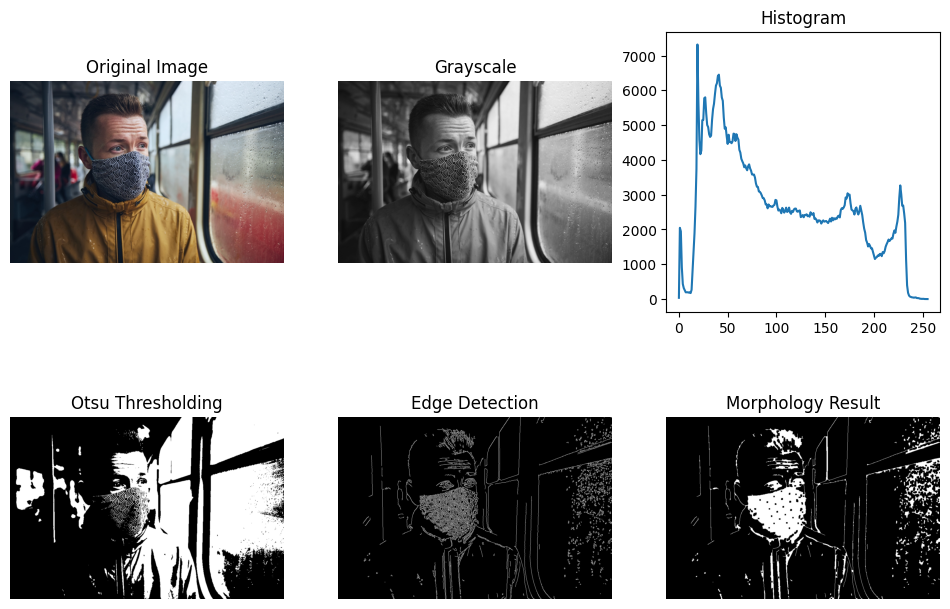

Jumlah pixel tepi (Edge): 31338
Jumlah pixel objek (Threshold): 264824


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(list(uploaded.keys())[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram
hist = cv2.calcHist([gray], [0], None, [256], [0,256])

# Otsu Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Morphology
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

# Feature extraction
edge_pixels = np.sum(edges > 0)
white_pixels = np.sum(thresh == 255)

# Display
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,3,3)
plt.plot(hist)
plt.title("Histogram")

plt.subplot(2,3,4)
plt.imshow(thresh, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(eroded, cmap='gray')
plt.title("Morphology Result")
plt.axis("off")

plt.show()

print("Jumlah pixel tepi (Edge):", edge_pixels)
print("Jumlah pixel objek (Threshold):", white_pixels)
